# **Sequence Modeling and Genome Mining to Discover Virulence Factors in Plant Pathogens**

The constant improvement of whole genome sequencing methodologies has offered important biological information. The databases containing sequences are essential resources for scientists dedicated to studying plant-pathogen interactions and mechanisms of virulence. However, the fast and constant generation of genomic data has created a bottleneck in its analysis. Processes like curation, organization, sharing, and analysis that transform "big data" into "smart data" are moving slowly. In several cases, the scientific community involved in plant-pathogen interaction needs fair access to bioinformatics resources that allow the ideal usage of big genomic data. This workshop aims to train scientists in managing and mining genome data. The workshop will use machine-learning approaches to model biological sequences. We will use a case study to design and implement a pipeline to explore the diversity of effectors in the *Xanthomonas* species. ​

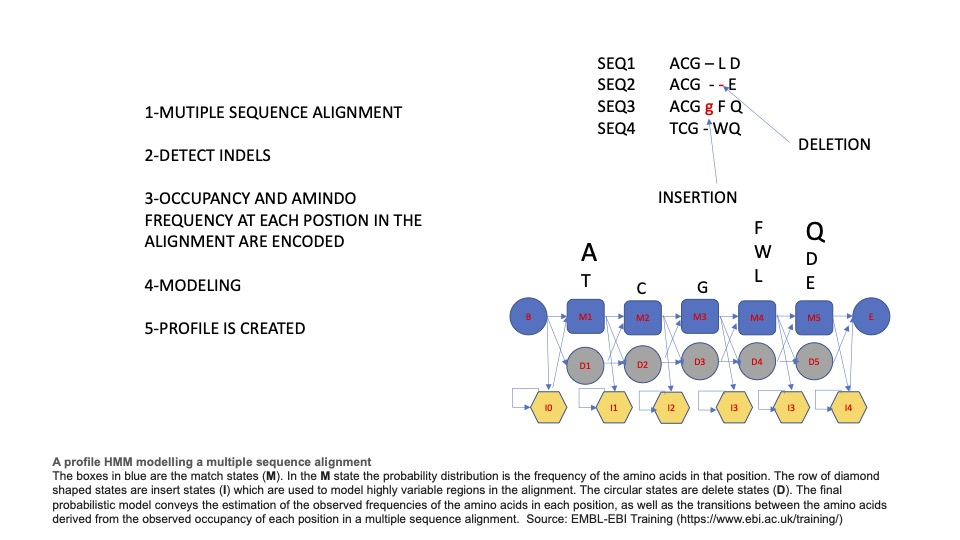

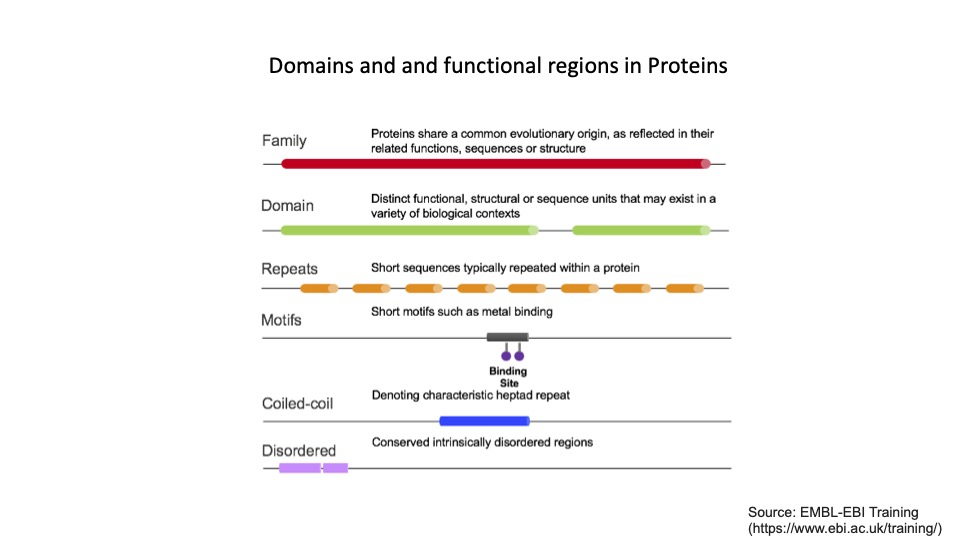

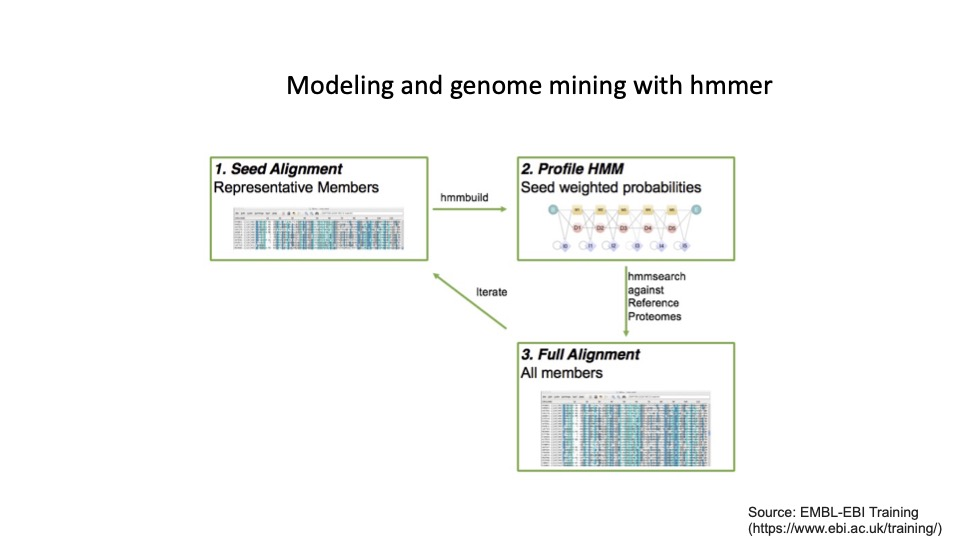

### **Install Resourcers and Tools**

### **Bioconda**
Bioconda lets you install thousands of software packages related to biomedical research using the conda package manager.
https://bioconda.github.io/

### **HMMER**
HMMER is a biological sequence analysis tool using profile hidden Markov models: http://hmmer.org/

### **ncbi-datasets**
A one-stop shop for finding, browsing, and downloading genomic data
https://www.ncbi.nlm.nih.gov/datasets/


### **ncbi-acc-download**
A partner script to the popular ncbi-genome-download script, ncbi-acc-download allows you to download sequences from GenBank/RefSeq by accession through the NCBI ENTREZ API.
https://github.com/kblin/ncbi-acc-download

### **MUSCLE**
MUSCLE (MUltiple Sequence Comparison by Log- Expectation) is a fast and wildly used multiple sequence alignment tool. https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-5-113

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


!conda install -c bioconda hmmer -y
!conda install -y bioconda::easel

!conda install -y -c conda-forge ncbi-datasets-cli

!pip install ncbi-acc-download

!conda install -y -c bioconda muscle

--2024-06-14 01:53:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  82.6MB/s    in 1.0s    

2024-06-14 01:53:34 (82.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## **Search and extract effector sequences from proteomes**

#### Non-TAL Effectors From *Xanthomonas oryzae* pv. *oryzae* Suppress Peptidoglycan-Triggered MAPK Activation in Rice

"*Xanthomonas oryzae* pv. *oryzae*, the causal pathogen of bacterial blight of rice, depends on its type III secretion system and associated effector proteins to grow and colonize the vascular tissues of rice plants. The type III effectors include a family of closely related transcription activator-like (TAL) effectors and the rest of diverse effectors, so-called non-TAL effectors. Our understanding of non-TAL effectors for pathogenesis in rice blight is still limited. Here we report a feasible method to rapidly detect the activation of mitogen-activated protein kinase pathway in rice mesophyll protoplasts by the *X. oryzae* pv. *oryzae* derived peptidoglycan and screen for virulent effectors that can suppress the pathogen-associated molecular pattern triggered immunity (PTI) response. Amongst 17 non-TAL effectors transiently expressed in rice cells, we found that three effectors (XopZ, XopN, and XopV) were able to suppress the peptidoglycan-triggered MAPK activation. The triple mutant of the X. oryzae pv. oryzae strain PXO99A lacking XopZ, XopN, and XopV showed additively reduced virulence. Adding back either of genes restored the virulence of the triple mutant. Our results demonstrate the collective and redundant ability of defense suppression by non-TAL effectors in causing bacterial blight of rice." (Long et al. 2018)

Here we use the XopZ protein as an example to build an effector model and search for homologs in various *Xanthomonas* strains.


#### **Make a hmm profile for XopZ**
The file list_gi contains the Genbank ids of a group of XopZ proteins. The following command will download the proteins listed in the file and save them in XopZ_proteins.pep

In [ ]:
!for x in `cat list_gi.txt`;do ncbi-acc-download -m protein $x;done
!cat [0-9]*.fa > XopZ_proteins.pep
!cat XopZ_proteins.pep

>WP_064631943.1 XopZ family type III secretion system effector [Xanthomonas nasturtii]
MTRIRPSNVTFGLPGNSRSTAHAGTPAPHKQSHQRLHQLDGRAAESEACAAEADVAARVHRYTAAATGTV
HDTPAPREAGRLRGVRKSLQKLAQFAGTAVGIARQATPDHTRLLRYQGTPAQPAPPAQADPGDWHALAPL
QIAAFSASQRLNDARIAGRKAAALERLVLLHLDRLEQAAGLHARRAPRLADRANDIRKRQQVLATWNALL
RKHIAKCSERLARTEQQLQEQLDQLMAMPAPAARDHRPRLRDMLKHEAELDRIRKLHEHARHLSALREKQ
QASLQRLQVRAASLDTTLAQALQSAHIVAGDLFETATQADDLRALLPALSGLKQSLEQELGSAVADDLNA
SQALQTASAALIAAQIAQTASSATDAAAATVLRKRLSTWANGLSTTRFGDQAVPAAGIVAIALGALRSAV
AGVLGDNRAEVALVLATFDHVHNSTWSALIPADPEESGVRPSAAMDERSGIPRAAIEAATTRWLETLSRI
PRGRQVLGQLIQVRHEPAADPGRQDIARIALRADALLRATPVDDAATRSWLSDARRAAGRALHAADPAQA
LQTCSSDERAAYHALRNGYESRAADSAYARANAHLQAFGEAVLCATSPQLAGAHASAPNPLHALSEGLEV
ASATALPTPRRRANLTLEHACAALIDYQGAVHAARPQGHIPSHVELSWQAAAELVQWVDEDVDRNGMVFD
AATLARIGERAAALHSHHQAQASRAPGGAVVQAAPPEGVQRAWEQLQSGHCSAPAAFDLLRTCLRAGRAE
HADQAAPLQPSDLSPQAALWRAHADDCLAHFDAAVDKTLQLLKQTGAGALAHPDSLLDLLRDMLSHLEWR
DRWRMTCQRTWGANLAPLSAAAALAGSAFGLGARLIASVQCNRDACLEFYMGRTGLYLQIS

####**Align the protein sequences using MUSCLE**

In [ ]:
!muscle -in XopZ_proteins.pep -out XopZ_aligment.msa
!cat XopZ_aligment.msa


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

XopZ_proteins 20 seqs, lengths min 594, max 1411, avg 1338
00:00:00     15 MB(4%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     15 MB(4%)  Iter   1  100.00%  K-mer dist pass 2
00:00:02     37 MB(9%)  Iter   1  100.00%  Align node
00:00:02     37 MB(9%)  Iter   1  100.00%  Root alignment
00:00:03     37 MB(9%)  Iter   2  100.00%  Refine tree
00:00:03     37 MB(9%)  Iter   2  100.00%  Root alignment
00:00:03     37 MB(9%)  Iter   2  100.00%  Root alignment
00:00:03     37 MB(9%)  Iter   3  100.00%  Refine biparts
00:00:03     37 MB(9%)  Iter   4  100.00%  Refine biparts
00:00:03     37 MB(9%)  Iter   5  100.00%  Refine biparts
00:00:03     37 MB(9%)  Iter   6  100.00%  Refine biparts
00:00:03     37 MB(9%)  Iter   7  100.00%  Refine biparts
00:00:03     37 MB(9%)  Iter   8  100.00%  Refine biparts
00:00:03     3

####**Build the HMMER model**

In [ ]:
!hmmbuild xopz_in_house.hmm XopZ_aligment.msa
!cat xopz_in_house.hmm

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             XopZ_aligment.msa
# output HMM file:                  xopz_in_house.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     XopZ_aligment           20  1486  1388     0.74  0.593 

# CPU time: 0.81u 0.00s 00:00:00.81 Elapsed: 00:00:00.82
HMMER3/f [3.1b2 | February 2015]
NAME  XopZ_aligment
LENG  1388
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Fri Jun 14 01:58:23 2024
NSEQ  20
EFFN  0.737305
CKSUM 4163923276
STATS LOCAL MSV      -13.4708  0.69490


####**Scan for Xopz homologues in Xanthomonas oryzae* pv *oryzicola Xoc***
Xoc causes bacterial leaf streak of rice
Use the xopz_in_house.hmm to scan and found XopZ homologues in a *Xanthomonas oryzae* pv *oryzicola* proteome.

1- Download the proteome of Xoc deposited in the Genbank

2- Use the hmm model to detect candidate homologs in one selected proteome

3- Use the hmm to detect candidate homologs in all the proteomes

In [ ]:
!datasets download genome taxon "Xanthomonas oryzae pv. oryzicola" --include protein
!unzip ncbi_dataset.zip

Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    0B connecting
Downloading: ncbi_dataset.zip    32kB 506kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.1kB 441kB/s
Downloading: ncbi_dataset.zip    32.8kB 260kB/s
Downloading: ncbi_dataset.zip    32.8kB 260kB/s
Downloading: ncbi_dataset.zip    65.5kB 440kB/s
Downloading: ncbi_dataset.zip    65.5kB 440kB/s
Downloading: ncbi_dataset.zip    65.5kB 440kB/s
Downloading: ncbi_dataset.zip    65.5kB 440kB/s
Downloading: ncbi_dataset.zip    131kB 689kB/s
Downloading: ncbi_dataset.zip    131kB 689kB/s
Do

In [ ]:
##list the proteomes
!ls ncbi_dataset/data/*/*.faa
!ls ncbi_dataset/data/*/*.faa | wc -l

ncbi_dataset/data/GCA_000168315.3/protein.faa  ncbi_dataset/data/GCF_000940825.1/protein.faa
ncbi_dataset/data/GCA_000940825.1/protein.faa  ncbi_dataset/data/GCF_001021915.1/protein.faa
ncbi_dataset/data/GCA_001021915.1/protein.faa  ncbi_dataset/data/GCF_001042735.1/protein.faa
ncbi_dataset/data/GCA_001042735.1/protein.faa  ncbi_dataset/data/GCF_001042745.1/protein.faa
ncbi_dataset/data/GCA_001042745.1/protein.faa  ncbi_dataset/data/GCF_001042775.1/protein.faa
ncbi_dataset/data/GCA_001042775.1/protein.faa  ncbi_dataset/data/GCF_001042795.1/protein.faa
ncbi_dataset/data/GCA_001042795.1/protein.faa  ncbi_dataset/data/GCF_001042815.1/protein.faa
ncbi_dataset/data/GCA_001042815.1/protein.faa  ncbi_dataset/data/GCF_001042835.1/protein.faa
ncbi_dataset/data/GCA_001042835.1/protein.faa  ncbi_dataset/data/GCF_001042855.1/protein.faa
ncbi_dataset/data/GCA_001042855.1/protein.faa  ncbi_dataset/data/GCF_001042875.1/protein.faa
ncbi_dataset/data/GCA_001042875.1/protein.faa  ncbi_dataset/data/GCF_0

In [ ]:
##pick one proteome and search
!hmmsearch -o ncbi_dataset/data/GCF_029962345.1/protein.faa_hits xopz_in_house.hmm ncbi_dataset/data/GCF_029962345.1/protein.faa
!cat ncbi_dataset/data/GCF_029962345.1/protein.faa_hits

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  xopz_in_house.hmm
# target sequence database:        ncbi_dataset/data/GCF_029962345.1/protein.faa
# output directed to file:         ncbi_dataset/data/GCF_029962345.1/protein.faa_hits
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       XopZ_aligment  [M=1388]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence       Description
    ------- ------ -----    ------- ------ -----   ---- --  --------       -----------
          0 2388.4  86.4          0 2388.2  86.4    1.0  1  WP_1496215

In [ ]:
##batch search. Mutiple proteome at single time
!for x in `ls ncbi_dataset/data/*/*.faa` ; do echo "Number of detected hits in" $x; hmmsearch xopz_in_house.hmm $x | grep -c ">>"; done
!for x in `ls ncbi_dataset/data/*/*.faa` ; do hmmsearch -o $x"_hits" xopz_in_house.hmm $x ; done

Number of detected hits in ncbi_dataset/data/GCA_000168315.3/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_000940825.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001021915.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042735.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042745.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042775.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042795.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042815.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042835.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042855.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001042875.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_001929305.1/protein.faa
1
Number of detected hits in ncbi_dataset/data/GCA_002189395.1/protein.faa
1
Number of detected hits i

In [ ]:
##for each proteome extract the XopZ homologue
# The esl-sfetch program (in easel/miniapps) is for extracting arbitrary subsets of sequences or subsequences from a sequence file.
!for x in `ls ncbi_dataset/data/*/*.faa` ; do esl-sfetch --index $x ; done
!for x in `ls ncbi_dataset/data/*/*.faa` ; do hmmsearch --tblout xopZ_myhits.tbl xopz_in_house.hmm $x; mv xopZ_myhits.tbl $x"_xopZ_myhits.tbl" ; done
!for x in `ls ncbi_dataset/data/*/*.faa` ; do grep -v "^#" $x"_xopZ_myhits.tbl" | awk '{print $1}' | esl-sfetch -f $x - > $x"_xopZ.fa"; done

Streaming output truncated to the last 5000 lines.
  XopZ_aligment   95 aleklglssgstedhtsllryssvqaardtpagasdrnadaardlraaallsnatqrlnealiarleqsnndlaariarrkqdeleylvaltld 188 
                     a+e lg+ssg++e+h +llryssvq +r+ pa +sd++a aa   +aa    na+q ln ali rleqsn+dlaari +r+ del+y++a+tl+
     OWB29024.1   95 AAELLGMSSGAPEPHATLLRYSSVQCERNRPADPSDSHASAAPSPQAALPPPNASQDLNGALIRRLEQSNHDLAARISQRRRDELKYAHAQTLQ 188 
                     ************************************************999******************************************* PP

  XopZ_aligment  189 alreqlalrarraarlsdsinaltkeraellqqlhgcnaqtdavaaaihdlesdilsaraalnallhdqpsravaahagpssadaqqgvdrkql 282 
                     a+reqlalrarra +lsdsi  lt+era llqqlhgcn+qtdav+aa++dl+++ilsaraal al+ d   rav +ha+ s+a+++++ d   l
     OWB29024.1  189 AAREQLALRARRAVNLSDSISVLTRERAALLQQLHGCNVQTDAVSAAMQDLQANILSARAALHALPVDPQLRAVVTHASQSAANTHESADSSPL 282 
                     ********************************************************************************************

Check your results in ncbi_dataset/data

**End of the first Case**

## **Search and extract TAL effector sequences from proteomes**
TAL effectors, also known as Transcription Activator-Like effectors, are proteins produced by the bacterial genus *Xanthomonas*. Xanthomonads are a group of Gram-negative bacteria that can cause plant diseases. TAL effectors are key virulence factors employed by xanthomonads to manipulate the host plant's cellular processes and establish infection.

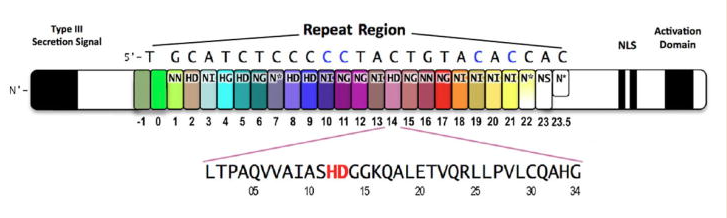.  
Source : Nga-Sze Mak et. al Curr Opin Struct Biol 2013

####**Obtain a HMM profile**
Example TALE protein:
https://www.ebi.ac.uk/interpro/entry/pfam/PF03377/

In [ ]:
##download a known tal effector to test your hmm profile
!ncbi-acc-download -m protein -o tale.fa 1070479254

In [ ]:
##run the hmm profile and obtain the results
!hmmsearch -o my_tale.tab PF03377.hmm tale.fa
!cat my_tale.tab
##the following comands report the number of repeats in the TAL effector sequence
!grep -c "!" my_tale.tab #complete repeats
!grep -c "?" my_tale.tab #truncate repeats

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  PF03377.hmm
# target sequence database:        tale.fa
# output directed to file:         my_tale.tab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       TAL_effector  [M=33]
Accession:   PF03377.16
Description: TAL effector repeat
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence   Description
    ------- ------ -----    ------- ------ -----   ---- --  --------   -----------
          0 1281.7 129.0    1.8e-18   52.9   0.2   30.9 31  AOS31582.1  TAL effector [Xanthomonas oryzae pv

In [ ]:
##run the hmm profile in a whole proetome.
!hmmsearch -o my_tales.tab PF03377.hmm ncbi_dataset/data/GCF_029962345.1/protein.faa

In [ ]:
#the following comand reports you the basic stats of the search
#How many Tales were found in the proteome
!grep -c ">>" my_tales.tab

25


In [ ]:
#The following comands detect the tal effectors and produce a file myTales_hits.fa . The file contains the protein sequences of all the detected TALes
!esl-sfetch --index ncbi_dataset/data/GCF_029962345.1/protein.faa
!hmmsearch --tblout my_tales.tbl PF03377.hmm ncbi_dataset/data/GCF_029962345.1/protein.faa
!grep -v "^#" my_tales.tbl | awk '{print $1}' | esl-sfetch -f ncbi_dataset/data/GCF_029962345.1/protein.faa - > myTales_hits.fa
!cat myTales_hits.fa

Streaming output truncated to the last 5000 lines.
                     TTHHHHHHHHHHHHHHHHH.TT--HHHHHHHHTS CS
    TAL_effector   1 dGGaQALeAVlahgpaLrq.rGfSradIVkIAgN 33 
                     +GG+QALe+V  ++p+L+q +G++++++V+ A++
  WP_149621718.1 505 NGGKQALETVQRLLPVLCQdHGLTPDQVVATASH 538
                     8*******************************98 PP

  == domain 11  score: 51.3 bits;  conditional E-value: 1.4e-16
                     TTHHHHHHHHHHHHHHHHH.TT--HHHHHHHHTS CS
    TAL_effector   1 dGGaQALeAVlahgpaLrq.rGfSradIVkIAgN 33 
                     dGG+QALe+V  ++p+L+q +G++++++V+IA+N
  WP_149621718.1 539 DGGKQALETVQRLLPVLCQdHGLTPDQVVAIASN 572
                     7********************************9 PP

  == domain 12  score: 51.3 bits;  conditional E-value: 1.4e-16
                     TTHHHHHHHHHHHHHHHHH.TT--HHHHHHHHTS CS
    TAL_effector   1 dGGaQALeAVlahgpaLrq.rGfSradIVkIAgN 33 
                     dGG+QALe+V  ++p+L+q +G++++++V+IA+N
  WP_149621718.1 573 DGGKQALETVQRLLPVLCQdHGLTPDQVVAIASN 

In [ ]:
#The following comands detect the tal effectors and produce a file myTaleshits_repeats.fa . The file will contain the protein sequences of all the detected Tale Repeats
!hmmsearch --domtblout my_tales.dtbl PF03377.hmm ncbi_dataset/data/GCF_029962345.1/protein.faa
!grep -v "^#" my_tales.dtbl | awk '{print $1"/"$20"-"$21, $20, $21, $1}' | esl-sfetch -Cf ncbi_dataset/data/GCF_029962345.1/protein.faa - > myTaleshits_repeats.fa

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  PF03377.hmm
# target sequence database:        ncbi_dataset/data/GCF_029962345.1/protein.faa
# per-dom hits tabular output:     my_tales.dtbl
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       TAL_effector  [M=33]
Accession:   PF03377.16
Description: TAL effector repeat
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence       Description
    ------- ------ -----    ------- ------ -----   ---- --  --------       -----------
          0 1414.4 121.6    5.4e-15   53.2   0.2   33.5 33 

In [ ]:
##Search tal effectors in all the Xoc proteomes
##the following command searches tal effectors and give you the number of effectors in each proteome
!for x in `ls ncbi_dataset/data/*/*.faa` ; do echo "number of tales found in" $x; hmmsearch PF03377.hmm $x | grep -c ">>"; done
#!for x in `ls ncbi_dataset/data/*/*.faa` ; do hmmsearch -o $x"_hits" PF03377.hmm $x ; done

number of tales found in ncbi_dataset/data/GCA_000168315.3/protein.faa
28
number of tales found in ncbi_dataset/data/GCA_000940825.1/protein.faa
22
number of tales found in ncbi_dataset/data/GCA_001021915.1/protein.faa
0
number of tales found in ncbi_dataset/data/GCA_001042735.1/protein.faa
28
number of tales found in ncbi_dataset/data/GCA_001042745.1/protein.faa
28
number of tales found in ncbi_dataset/data/GCA_001042775.1/protein.faa
25
number of tales found in ncbi_dataset/data/GCA_001042795.1/protein.faa
26
number of tales found in ncbi_dataset/data/GCA_001042815.1/protein.faa
20
number of tales found in ncbi_dataset/data/GCA_001042835.1/protein.faa
20
number of tales found in ncbi_dataset/data/GCA_001042855.1/protein.faa
29
number of tales found in ncbi_dataset/data/GCA_001042875.1/protein.faa
23
number of tales found in ncbi_dataset/data/GCA_001929305.1/protein.faa
1
number of tales found in ncbi_dataset/data/GCA_002189395.1/protein.faa
34
number of tales found in ncbi_dataset/da

In [ ]:
##the following comands report the tale sequences of all the proteomes . Results will be saved in the file that contains the extension "tales.fa"
!for x in `ls ncbi_dataset/data/*/*.faa` ; do esl-sfetch --index $x ; done
!for x in `ls ncbi_dataset/data/*/*.faa` ; do hmmsearch --tblout myhits2.tbl PF03377.hmm $x; mv myhits2.tbl $x"_myhits2.tbl" ; done
!for x in `ls ncbi_dataset/data/*/*.faa` ; do grep -v "^#" $x"_myhits2.tbl" | awk '{print $1}' | esl-sfetch -f $x - > $x"_tales.fa"; done

Streaming output truncated to the last 5000 lines.
   2 ?    1.4   0.1      0.67        85       3      31 ..     234     264 ..     233     264 .. 0.77
   3 !   36.3   0.3   7.8e-12   9.9e-10       2      33 .]     267     300 ..     266     300 .. 0.98
   4 !   51.7   0.2   1.2e-16   1.6e-14       1      33 []     301     334 ..     301     334 .. 0.99
   5 !   52.0   0.1   9.8e-17   1.2e-14       1      33 []     335     368 ..     335     368 .. 0.99
   6 !   47.9   0.1   1.8e-15   2.3e-13       1      33 []     369     402 ..     369     402 .. 0.97
   7 !   50.0   0.2   4.1e-16   5.2e-14       2      33 .]     404     436 ..     403     436 .. 0.99
   8 !   53.0   0.3   4.9e-17   6.2e-15       1      33 []     437     470 ..     437     470 .. 0.99
   9 !   53.0   0.3   4.9e-17   6.2e-15       1      33 []     471     504 ..     471     504 .. 0.99
  10 !   53.6   0.2   3.2e-17   4.1e-15       1      33 []     505     538 ..     505     538 .. 0.99
  11 !   48.1   0.1   1.7e-15  